# Credit Card Fraud Detection


##References
* [Dataset-Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)
* [GitHub Repository](https://github.com/jgcorliss/credit-card-fraud) 


## Import Libraries

In [40]:
from IPython import get_ipython 
get_ipython().magic('clear')
import numpy
import pandas
import seaborn
import sklearn.model_selection as ms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import sklearn.metrics as sklm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### Read Data Set

In [41]:
data = pd.read_csv('creditcard.csv')
data_fraud=data[data.Class==1]
data_normal=data[data.Class==0].sample(n=len(data_fraud))

In [42]:
print(data.columns)
data=pd.concat([data_fraud,data_normal])
print(data.shape)
print(data.describe())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(984, 31)
                Time          V1          V2          V3          V4  \
count     984.000000  984.000000  984.000000  984.000000  984.000000   
mean    88252.897358   -2.319843    1.814526   -3.451903    2.240877   
std     48564.010376    5.498066    3.666891    6.242798    3.245548   
min       406.000000  -30.552380  -13.665820  -31.103685   -3.461543   
25%     46820.750000   -2.732232   -0.102884   -5.084967   -0.197926   
50%     80497.500000   -0.700217    0.948919   -1.183593    1.342453   
75%    135315.000000    1.008370    2.747009    0.362224    4.289110   
max    172782.000000    2.389259   22.057729    3.265456   12.114672   

               V5          V6          V7          V8          V9  ...  \
co

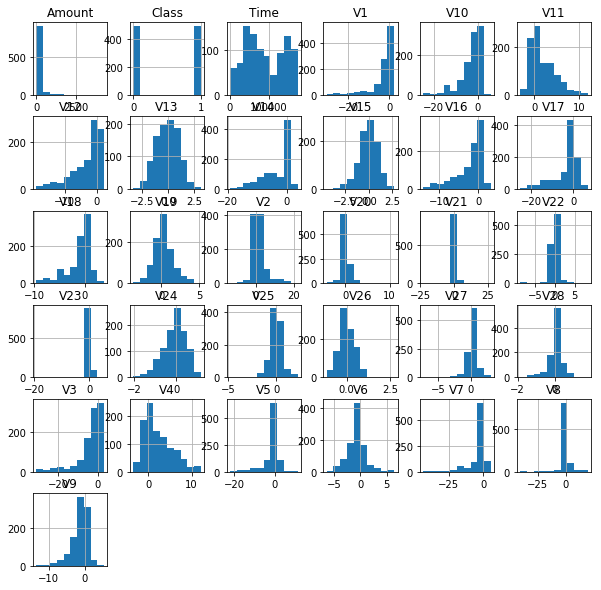

Fraud Cases: 492
Valid Transactions: 492


In [43]:
data.hist(figsize = (10, 10))
plt.show()

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


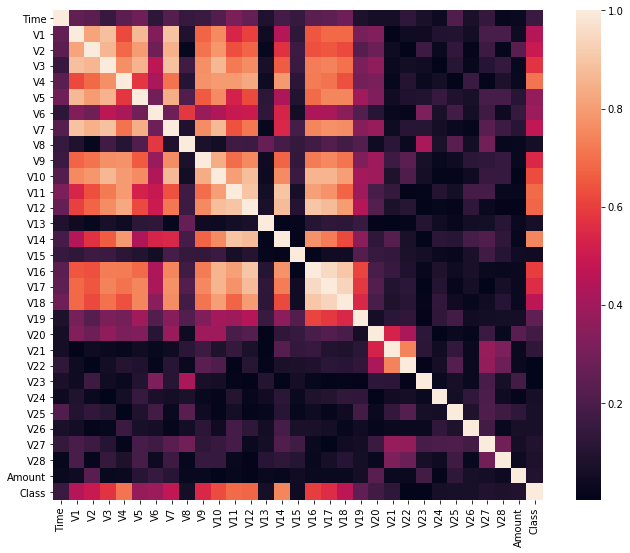

In [44]:
corrmat = data.corr().abs()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()


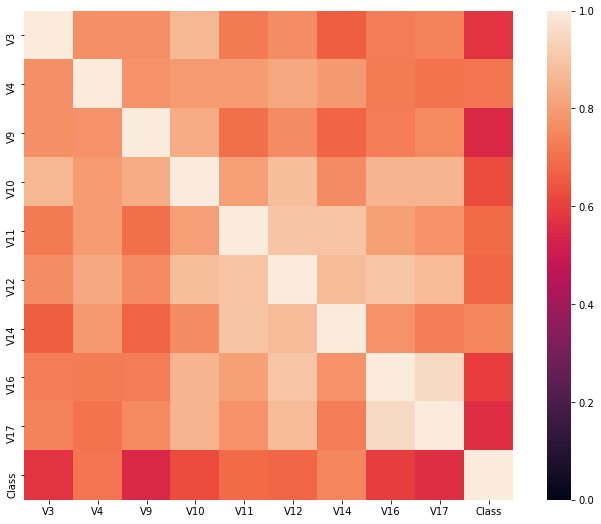

In [50]:
# to reduce the dimentionality, only parameter with corelation more than 0.5 willl be use
best_correlation=corrmat.Class[corrmat.Class>0.5]
data=data[best_correlation.index]

corrmat = data.corr().abs()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat,vmin=0, vmax = 1, square = True)
plt.show()

In [46]:
columns = data.columns.tolist()

# Choose Train Columns
columns = [c for c in columns if c not in ["Class"]]

# Target Column
target = "Class"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(984, 9)
(984,)


In [47]:
X_train, X_test, Y_train, Y_test = ms.train_test_split(X, Y, test_size=0.2, random_state=111)

In [48]:
param_grid = {"max_features": [2, 3, 5, 8], "min_samples_leaf":[3, 5, 10, 20]}
nr.seed(123)
rf_clf = RandomForestClassifier(class_weight = "balanced") 

nr.seed(123)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(X_train, Y_train)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)


nr.seed(123)
rf_clf2=RandomForestClassifier( min_samples_leaf=rf_clf.best_estimator_.min_samples_leaf,max_features=rf_clf.best_estimator_.max_features)
cv_estimate = ms.cross_val_score(rf_clf2, X_train, Y_train) 
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))


rf_clf=RandomForestClassifier( min_samples_leaf=rf_clf.best_estimator_.min_samples_leaf,max_features=rf_clf.best_estimator_.max_features)
rf_clf.fit(X_train, Y_train) 
ko=rf_clf.predict(X_test)
metrics = sklm.precision_recall_fscore_support(Y_test.values, ko)
conf = sklm.confusion_matrix(Y_test.values, ko)
print('                 Confusion matrix')
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')
print('Accuracy  %0.2f' % sklm.accuracy_score(Y_test.values, ko))
print(' ')
print(classification_report(Y_test.values, ko))


C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWar

C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\si

2
10
Mean performance metric = 0.933
SDT of the metric       = 0.002
Outcomes by cv fold
Fold  1    0.932
Fold  2    0.935
Fold  3    0.931
                 Confusion matrix
                 Score positive    Score negative
Actual positive       103                 1
Actual negative        11                82

Accuracy  0.94
 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       104
           1       0.99      0.88      0.93        93

   micro avg       0.94      0.94      0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWar

In [49]:
param_grid = {"learning_rate": [0.1, 1, 10]}
nr.seed(123)
ab_clf = AdaBoostClassifier()  

nr.seed(123)
ab_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid, 
                      scoring = 'roc_auc',
                      return_train_score = True)
ab_clf.fit(X_train, Y_train)
print(ab_clf.best_estimator_.learning_rate)


nr.seed(123)
ada_clf2 = AdaBoostClassifier(learning_rate=ab_clf.best_estimator_.learning_rate, n_estimators=ab_clf.best_estimator_.n_estimators)
cv_estimate = ms.cross_val_score(ada_clf2, X_train, Y_train) 
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))
    
    
ada_clf = AdaBoostClassifier(learning_rate=ab_clf.best_estimator_.learning_rate, n_estimators=ab_clf.best_estimator_.n_estimators)
ada_clf.fit(X_train, Y_train) 
ko=ada_clf.predict(X_test)
metrics = sklm.precision_recall_fscore_support(Y_test.values, ko)
conf = sklm.confusion_matrix(Y_test.values, ko)
print('                 Confusion matrix')
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')
print('Accuracy  %0.2f' % sklm.accuracy_score(Y_test.values, ko))
print(' ')
print(classification_report(Y_test.values, ko))



C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.1


C:\Users\user\Miniconda2\envs\py3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Mean performance metric = 0.934
SDT of the metric       = 0.004
Outcomes by cv fold
Fold  1    0.932
Fold  2    0.939
Fold  3    0.931
                 Confusion matrix
                 Score positive    Score negative
Actual positive       103                 1
Actual negative        10                83

Accuracy  0.94
 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       104
           1       0.99      0.89      0.94        93

   micro avg       0.94      0.94      0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197

